In [21]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [22]:
# Read the CSV file into a Pandas DataFrame
df_heart = pd.read_csv("../Resources/Heart_Disease_Prediction.csv")

# Review the DataFrame
df_heart.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [23]:
# Convert heart disease column to binary
# Presence will be 1 and Absence will be 0
binary = {'Presence': 1, 'Absence': 0}
df_heart['Heart Disease'] = df_heart['Heart Disease'].map(binary)
df_heart.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [24]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = df_heart['Heart Disease']

# The X variable should include all features except the target
X = df_heart.drop(columns=['Heart Disease'])

In [25]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [26]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [66]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=13))

In [67]:
# Add addtional layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu"))

In [68]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [69]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 70        
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
 dense_14 (Dense)            (None, 5)                 30        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [71]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=75)

Epoch 1/75
7/7 [==============================] - 3s 6ms/step - loss: 0.7267 - accuracy: 0.4752
Epoch 2/75
7/7 [==============================] - 0s 7ms/step - loss: 0.7081 - accuracy: 0.4752
Epoch 3/75
7/7 [==============================] - 0s 8ms/step - loss: 0.6914 - accuracy: 0.4851
Epoch 4/75
7/7 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.5000
Epoch 5/75
7/7 [==============================] - 0s 13ms/step - loss: 0.6644 - accuracy: 0.5099
Epoch 6/75
7/7 [==============================] - 0s 9ms/step - loss: 0.6529 - accuracy: 0.5396
Epoch 7/75
7/7 [==============================] - 0s 9ms/step - loss: 0.6420 - accuracy: 0.5495
Epoch 8/75
7/7 [==============================] - 0s 14ms/step - loss: 0.6329 - accuracy: 0.5693
Epoch 9/75
7/7 [==============================] - 0s 18ms/step - loss: 0.6244 - accuracy: 0.5941
Epoch 10/75
7/7 [==============================] - 0s 11ms/step - loss: 0.6168 - accuracy: 0.6139
Epoch 11/75
7/7 [==================

In [72]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

3/3 - 0s - loss: 0.4234 - accuracy: 0.8235 - 268ms/epoch - 89ms/step
Loss: 0.42341047525405884, Accuracy: 0.8235294222831726


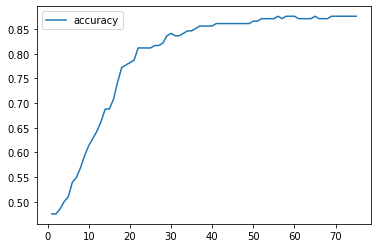

In [73]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")